## Imports & rename

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [43]:
#load data/moviesummaries/character.metadata.tsv
character_metadata = pd.read_csv('../data/moviesummaries/character.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/plot_summaries.txt
plot_summaries = pd.read_csv('../data/moviesummaries/plot_summaries.txt', sep='\t', header=None)

#load data/moviesummaries/movie.metadata.tsv
movie_metadata = pd.read_csv('../data/moviesummaries/movie.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/name.clusters.txt
name_clusters = pd.read_csv('../data/moviesummaries/name.clusters.txt', sep='\t', header=None)


In [44]:
#rename columns to match documentation 

character_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", 
                              "Actor height", "Actor ethnicity", "Actor name", "Actor age", "Freebase character/actor map ID", 
                              "Freebase character ID", "Freebase actor ID"]

character_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [45]:
#rename columns to match documentation

plot_summaries.columns = ["Wikipedia movie ID", "Summary"]

plot_summaries.head()

,Wikipedia movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [46]:
#rename columns to match documentation

movie_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie revenue", "Movie runtime",
                          "Movie languages", "Movie countries", "Movie genres"]

movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [47]:
# rename columns to match documentation

name_clusters.columns = ["Character name", "Freebase character/actor map ID"]

name_clusters.head()

,Character name,Freebase character/actor map ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


## Data relationships and completeness

In [30]:
# check the number and percentage of null values in each column of character_metadata as well as the number of different values in each column. Show the results in a single dataframe.

character_metadata_null = pd.DataFrame(character_metadata.isnull().sum(), columns=['Number of null values'])
character_metadata_null['Percentage of null values'] = character_metadata_null['Number of null values'] / len(character_metadata)
character_metadata_null['Number of unique values'] = character_metadata.nunique()

character_metadata_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.000000,64330
Freebase movie ID,0,0.000000,64330
Movie release date,9995,0.022178,18476
Character name,257875,0.572205,126629
Actor date of birth,106145,0.235528,29494
Actor gender,45609,0.101203,2
Actor height,295845,0.656457,221
Actor ethnicity,344611,0.764665,479
Actor name,1228,0.002725,134078
Actor age,158113,0.350841,155


In [31]:
# check the number and percentage of null values in each column of plot_summaries as well as the number of different values in each column. Show the results in a single dataframe.

plot_summaries_null = pd.DataFrame(plot_summaries.isnull().sum(), columns=['Number of null values'])
plot_summaries_null['Percentage of null values'] = plot_summaries_null['Number of null values'] / len(plot_summaries)
plot_summaries_null['Number of unique values'] = plot_summaries.nunique()

plot_summaries_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.0,42303
Summary,0,0.0,42295


In [35]:
# show summary duplicates

plot_summaries[plot_summaries.duplicated(subset=['Summary'])]

,Wikipedia movie ID,Summary
14631,14055212,A woman is thrown out of her home by her jealo...
29428,14022275,A woman is thrown out of her home by her jealo...
30987,14051944,A woman is thrown out of her home by her jealo...
31702,14053389,A woman is thrown out of her home by her jealo...
35058,19609453,Raja was adopted by a criminal don at a very ...
38536,14616220,"As the American Civil War begins, Ned Burton l..."
38831,10791937,Taking a step aside from the usual serious dra...
39019,29481480,An orphan Raghav turns into a ruthless contrac...


In [36]:
# check the number and percentage of null values in each column of movie_metadata as well as the number of different values in each column. Show the results in a single dataframe.

movie_metadata_null = pd.DataFrame(movie_metadata.isnull().sum(), columns=['Number of null values'])
movie_metadata_null['Percentage of null values'] = movie_metadata_null['Number of null values'] / len(movie_metadata)
movie_metadata_null['Number of unique values'] = movie_metadata.nunique()

movie_metadata_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.000000,81741
Freebase movie ID,0,0.000000,81741
Movie name,0,0.000000,75478
Movie release date,6902,0.084437,20389
Movie revenue,73340,0.897224,7362
Movie runtime,20450,0.250180,597
Movie languages,0,0.000000,1817
Movie countries,0,0.000000,2124
Movie genres,0,0.000000,23817


In [37]:
# check the number and percentage of null values in each column of name_clusters as well as the number of different values in each column. Show the results in a single dataframe.

name_clusters_null = pd.DataFrame(name_clusters.isnull().sum(), columns=['Number of null values'])
name_clusters_null['Percentage of null values'] = name_clusters_null['Number of null values'] / len(name_clusters)
name_clusters_null['Number of unique values'] = name_clusters.nunique()

name_clusters_null

,Number of null values,Percentage of null values,Number of unique values
Character name,0,0.0,970
Freebase character/actor map ID,0,0.0,2661


## Relationship between datasets

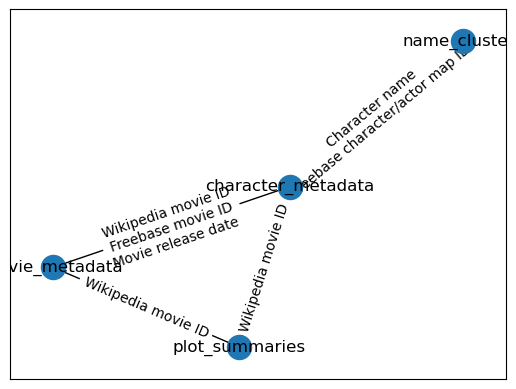

In [27]:
# create a graph with four nodes, each representing a dataframe using networkx to model the dataframe's relationships

G = nx.Graph()

# add the four nodes to the graph (character_metadata, plot_summaries, movie_metadata, name_clusters)
nodes = ["character_metadata", "plot_summaries", "movie_metadata", "name_clusters"]

G.add_nodes_from(nodes)

# add edges to the graph to represent the relationships between the dataframes

G.add_edges_from([("character_metadata", "plot_summaries"), ("character_metadata", "movie_metadata"), ("character_metadata", "name_clusters"),
                  ("plot_summaries", "movie_metadata")])

# add labels to the edges

G.edges["character_metadata", "plot_summaries"]['label'] = "Wikipedia movie ID"
G.edges["character_metadata", "movie_metadata"]['label'] = "Wikipedia movie ID\nFreebase movie ID\nMovie release date"
G.edges["character_metadata", "name_clusters"]['label'] = "Character name\nFreebase character/actor map ID"
G.edges["plot_summaries", "movie_metadata"]['label'] = "Wikipedia movie ID" 

# plot the graph with edge labels

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
plt.show()

#### character_metadata -> movie_metadata

In [39]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of movie_metadata

character_metadata['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True    450669
Name: count, dtype: int64

In [40]:
# check if each value of the column Freebase movie ID of character_metadata appears in the column Freebase movie ID of movie_metadata

character_metadata['Freebase movie ID'].isin(movie_metadata['Freebase movie ID']).value_counts()

Freebase movie ID
True    450669
Name: count, dtype: int64

In [41]:
# check if each value of the column Movie release date of character_metadata appears in the column Movie release date of movie_metadata

character_metadata['Movie release date'].isin(movie_metadata['Movie release date']).value_counts()

Movie release date
True    450669
Name: count, dtype: int64

#### movie_metadata -> character_metadata

In [42]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of character_metadata

movie_metadata['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     64330
False    17411
Name: count, dtype: int64

In [43]:
# check if each value of the column Freebase movie ID of movie_metadata appears in the column Freebase movie ID of character_metadata

movie_metadata['Freebase movie ID'].isin(character_metadata['Freebase movie ID']).value_counts()

Freebase movie ID
True     64330
False    17411
Name: count, dtype: int64

In [44]:
# check if each value of the column Movie release date of movie_metadata appears in the column Movie release date of character_metadata

movie_metadata['Movie release date'].isin(character_metadata['Movie release date']).value_counts()

Movie release date
True     79613
False     2128
Name: count, dtype: int64

#### character_metadata -> name_cluster

In [45]:
# check if each value of the column Character name of character_metadata appears in the column Character name of name_clusters

character_metadata['Character name'].isin(name_clusters['Character name']).value_counts()

Character name
False    446369
True       4300
Name: count, dtype: int64

In [46]:
# check if each value of the column Freebase character/actor map ID of character_metadata appears in the column Freebase character/actor map ID of name_clusters

character_metadata['Freebase character/actor map ID'].isin(name_clusters['Freebase character/actor map ID']).value_counts()

Freebase character/actor map ID
False    448008
True       2661
Name: count, dtype: int64

#### name_cluster -> character_metadata

In [47]:
# check if each value of the column Character name of name_clusters appears in the column Character name of character_metadata

name_clusters['Character name'].isin(character_metadata['Character name']).value_counts()

Character name
True    2666
Name: count, dtype: int64

In [48]:
# check if each value of the column Freebase character/actor map ID of name_clusters appears in the column Freebase character/actor map ID of character_metadata

name_clusters['Freebase character/actor map ID'].isin(character_metadata['Freebase character/actor map ID']).value_counts()

Freebase character/actor map ID
True    2666
Name: count, dtype: int64

#### character_metadata -> plot_summaries

In [49]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of plot_summaries

character_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     308485
False    142184
Name: count, dtype: int64

#### plot_summaries -> character_metadata

In [50]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of character_metadata

plot_summaries['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     37779
False     4524
Name: count, dtype: int64

#### movie_metadata -> plot_summaries

In [51]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of plot_summaries

movie_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     42204
False    39537
Name: count, dtype: int64

#### plot_summaries -> movie_metadata

In [52]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of movie_metadata

plot_summaries['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     42204
False       99
Name: count, dtype: int64

## Merging the data 

In [48]:
# Merging character_metadata and movie_metadata on Wikipedia movie ID

character_movie = pd.merge(character_metadata, movie_metadata, on='Wikipedia movie ID', how='outer') #The outer join yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate.
character_movie.head()
are_columns_equal = (character_movie['Freebase movie ID_x'] == character_movie['Freebase movie ID_y']).all()
character_movie.head()

,Wikipedia movie ID,Freebase movie ID_x,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age,...,Freebase character ID,Freebase actor ID,Freebase movie ID_y,Movie name,Movie release date_y,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,/m/0bgcj3x,/m/03wcfv7,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0bgchn4,/m/0346l4,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/0bgchn_,/m/01vw26l,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,/m/0bgchnq,/m/034hyc,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,/m/0bgchp9,/m/01y9xg,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [49]:
#merging movie_metadata and plot_summaries on Wikipedia movie ID

movie_plot = pd.merge(movie_metadata, plot_summaries, on='Wikipedia movie ID', how='outer')
movie_plot.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."


# Exploration Faye

## Feasability of a analysis of movies produced in the US

The percentage of data dropped is:  8.620088167200533


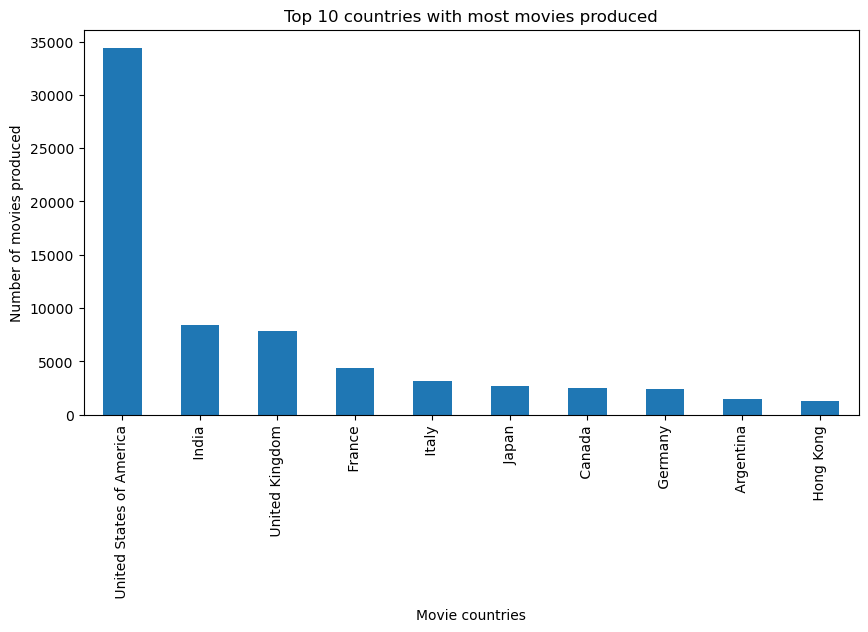

Percentage of movies produced by USA:  39.80610604009764 %


In [81]:
# Converting the dictionnary structure to a list (to be able to perform a split), and renaming the col
country_list = pd.DataFrame(movie_metadata['Movie countries'].tolist())
country_list.rename(columns={0: 'Movie countries'}, inplace=True)

# Since some movie are coproduced by several countries, we seperate them into different rows. 
# This way, a film produced by two countries will account for +1 production for each country

country_list = country_list['Movie countries'].str.split(', ', expand=True)

# Droping NAN and converting to a Dataframe
country_stacked = country_list.stack().dropna().rename('Movie countries')

country_stacked = pd.DataFrame(country_stacked)

# Drop rows where 'Movie countries' is an empty string '{}'
original_length = len(country_stacked)
country_stacked = country_stacked[country_stacked['Movie countries'] != '{}']
new_length = len(country_stacked)
print("The percentage of data dropped is: ", (original_length - new_length)/original_length * 100)

# Removing uneeded characters
country_stacked['Movie countries'] = country_stacked['Movie countries'].str.replace("{", "")
country_stacked['Movie countries'] = country_stacked['Movie countries'].str.replace("}", "")
country_stacked['Movie countries'] = country_stacked['Movie countries'].str.replace('"', "")
country_stacked['Movie countries'] = country_stacked['Movie countries'].str.split(':', expand=True).iloc[:, 1]

# Counting the number of movies produced by country
country_count = country_stacked.groupby(['Movie countries']).size()

# Plotting top 10 countries with most movies produced
country_sorted = country_count.sort_values(ascending=False)
country_sorted.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 countries with most movies produced')
plt.ylabel('Number of movies produced')
plt.show()

# Percentage of movies produced by the USA
print('Percentage of movies produced by USA: ', country_sorted[0].sum() / country_count.sum() * 100, '%')

Although there are no NaN values in the movie country from the movie metadata df, there is 8% of the country name that is an empty string. Therefore, a study based on the country of the movie could be interesting. Here, we check if there is enough movies from the US to have a complete analysis.

Almost 40% of the data without empty values has the US as a movie country. Let's see how many missing box-office values there are in movies from the US.

In [83]:
# Selecting movies from the USA
movies_usa = movie_metadata[movie_metadata['Movie countries'].str.contains('United States of America')]

# Checking the fraction of these movies with a null box-office revenue
print('Fraction of movies from the USA with a null box-office revenue: ', movies_usa['Movie revenue'].isnull().sum() / len(movies_usa) * 100, '%')

Fraction of movies from the USA with a null box-office revenue:  79.84189723320159 %


Even when only looking at movies from the US, almost 80% of those don't have data for the box office.
Therefore, we decide to NOT use the box-office data at all.

## Handling dictionnary structures
- Movie languages (Freebase ID:name tuples)
- Movie countries (Freebase ID:name tuples)
- Movie genres (Freebase ID:name tuples)

## Test

In [27]:
import ast

movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(ast.literal_eval)

In [29]:
all_genres = set()

for genres_dict in movie_metadata['Movie genres']:
    all_genres.update(genres_dict.values())

# Convert the set of genres back to a list if needed
unique_genres_list = list(all_genres)

print(unique_genres_list)

['Splatter film', 'Juvenile Delinquency Film', 'Adventure Comedy', 'Pornographic movie', 'Family-Oriented Adventure', 'Satire', 'Reboot', 'Sword and Sandal', 'Glamorized Spy Film', 'Feature film', 'Jukebox musical', 'Action Thrillers', 'Gangster Film', 'News', 'Biker Film', 'Christian film', 'Travel', 'Educational', 'Superhero', 'Z movie', 'Comedy of manners', 'Cavalry Film', 'C-Movie', 'Psychological horror', 'Political cinema', 'Action', 'Bloopers & Candid Camera', 'Chick flick', 'Surrealism', 'Docudrama', 'Anthropology', 'Comedy film', 'Crime', 'Foreign legion', 'Fantasy Adventure', 'Plague', 'Animation', 'Kitchen sink realism', 'Domestic Comedy', 'Short Film', 'Crime Thriller', 'Period piece', 'Disaster', 'Sponsored film', 'Beach Party film', 'New Hollywood', 'Revisionist Fairy Tale', 'Melodrama', 'Dogme 95', 'Outlaw', 'Tragedy', 'B-movie', 'Hagiography', 'Filipino', 'Clay animation', 'Prison', 'Chinese Movies', 'Chase Movie', 'Backstage Musical', 'Media Satire', 'Hybrid Western', 

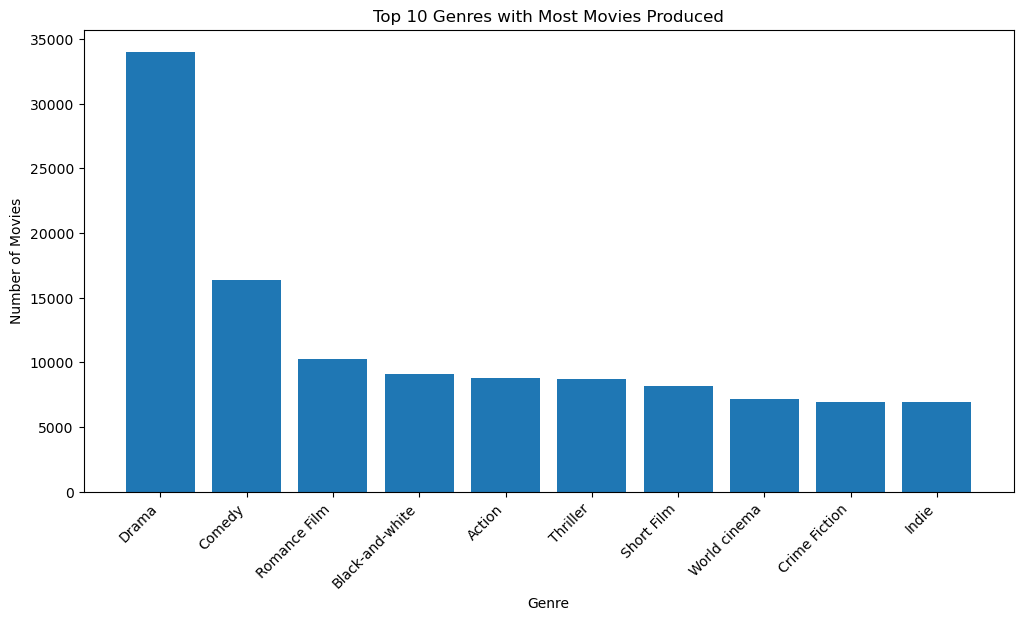

In [33]:
# Compute a box plot of top 10 genres with most movies produced
# Flatten the genres and count the occurrences
genre_counts = {}

for genres_dict in movie_metadata['Movie genres']:
    for genre in genres_dict.values():
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Get the top 10 genres
top_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a new DataFrame with the top genres
top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_genres_df['Genre'], top_genres_df['Count'])
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 10 Genres with Most Movies Produced')
plt.xticks(rotation=45, ha='right')
plt.show()

## Final

In [50]:
# Print an example of the movie country column
print(movie_plot['Movie countries'].iloc[0])
print(type(movie_plot['Movie countries'].iloc[0]))
print(movie_plot['Movie genres'].iloc[0])
print(type(movie_plot['Movie genres'].iloc[0]))
print(movie_plot['Movie languages'].iloc[0])
print(type(movie_plot['Movie languages'].iloc[0]))

{"/m/09c7w0": "United States of America"}
<class 'str'>
{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}
<class 'str'>
{"/m/02h40lc": "English Language"}
<class 'str'>


We see that some columns are written as a dictionnary but saved as a string. 

Three columns concerned by this problem:
- Movie languages (Freebase ID:name tuples)
- Movie countries (Freebase ID:name tuples)
- Movie genres (Freebase ID:name tuples)

Let's convert these columns back to dictionnaries to be able to use this structure.

In [51]:
import ast

movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(ast.literal_eval)
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(ast.literal_eval)
movie_metadata['Movie languages'] = movie_metadata['Movie languages'].apply(ast.literal_eval)
print(movie_metadata['Movie countries'].iloc[0])
print(type(movie_metadata['Movie countries'].iloc[0]))
print(movie_metadata['Movie genres'].iloc[0])
print(type(movie_metadata['Movie genres'].iloc[0]))
print(movie_metadata['Movie languages'].iloc[0])
print(type(movie_metadata['Movie languages'].iloc[0]))

{'/m/09c7w0': 'United States of America'}
<class 'dict'>
{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science Fiction', '/m/03npn': 'Horror', '/m/03k9fj': 'Adventure', '/m/0fdjb': 'Supernatural', '/m/02kdv5l': 'Action', '/m/09zvmj': 'Space western'}
<class 'dict'>
{'/m/02h40lc': 'English Language'}
<class 'dict'>


Let's draw some basic information from these columns.

In [54]:
def extract_unique_values(df, column_name):
    all_values = set()

    for values_dict in df[column_name]:
        all_values.update(values_dict.values())

    # Convert the set of values back to a list if needed
    unique_values_list = list(all_values)

    return unique_values_list

In [55]:
# Print number of unique movie countries, genres and languages

unique_countries_list = extract_unique_values(movie_metadata, 'Movie countries')
unique_genres_list = extract_unique_values(movie_metadata, 'Movie genres')
unique_languages_list = extract_unique_values(movie_metadata, 'Movie languages')

print('Number of unique movie countries:', len(unique_countries_list))
print('Number of unique movie genres:', len(unique_genres_list))
print('Number of unique movie languages:', len(unique_languages_list))

Number of unique movie countries: 147
Number of unique movie genres: 363
Number of unique movie languages: 207


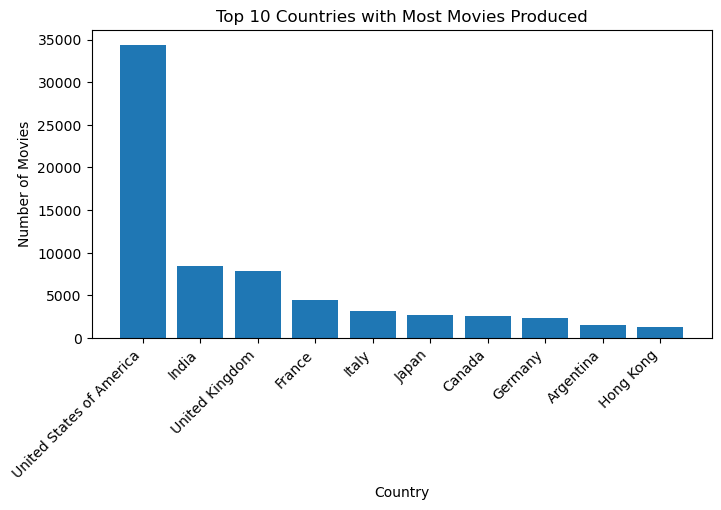

The top 1 production country is United States of America and concerns 39.81% of all movies produced.


In [74]:
# Compute a box plot of top 10 coutrnies with most movies produced
# Flatten the countries and count the occurrences
country_counts = {}

for country_dict in movie_metadata['Movie countries']:
    for country in country_dict.values():
        country_counts[country] = country_counts.get(country, 0) + 1

# Get the top 10 countries
top_countries = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a new DataFrame with the top countries
top_countries_df = pd.DataFrame(top_countries, columns=['Country', 'Count'])

# Bar plot
plt.figure(figsize=(8, 4))
plt.bar(top_countries_df['Country'], top_countries_df['Count'])
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Top 10 Countries with Most Movies Produced')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the top 1 country and its percentage
top_1_country = top_countries_df['Country'].iloc[0]
percentage = country_counts[top_1_country] / sum(country_counts.values()) * 100
print(f'The top 1 production country is {top_1_country} and concerns {percentage:.2f}% of all movies produced.')

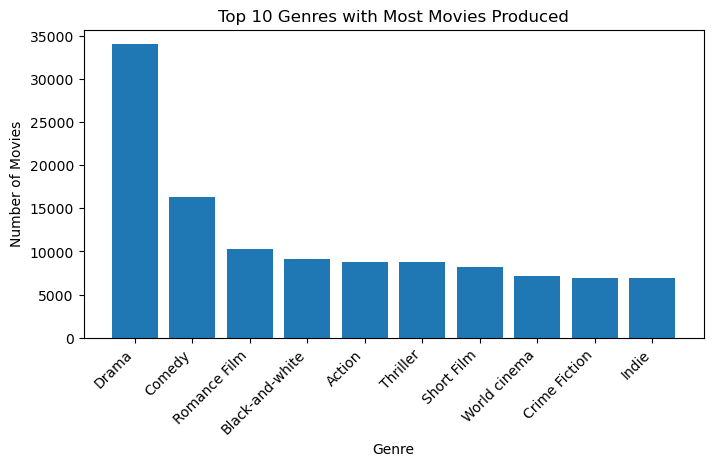

The top 1 genre is Drama and represents 13.98% of all movies produced.


In [75]:
# Compute a box plot of top 10 genres with most movies produced
# Flatten the genres and count the occurrences
genre_counts = {}

for genres_dict in movie_metadata['Movie genres']:
    for genre in genres_dict.values():
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Get the top 10 genres
top_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a new DataFrame with the top genres
top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Bar plot
plt.figure(figsize=(8, 4))
plt.bar(top_genres_df['Genre'], top_genres_df['Count'])
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 10 Genres with Most Movies Produced')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the top 1 genre and its percentage
top_1_genre = top_genres_df['Genre'].iloc[0]
percentage = genre_counts[top_1_genre] / sum(genre_counts.values()) * 100
print(f'The top 1 genre is {top_1_genre} and represents {percentage:.2f}% of all movies produced.')

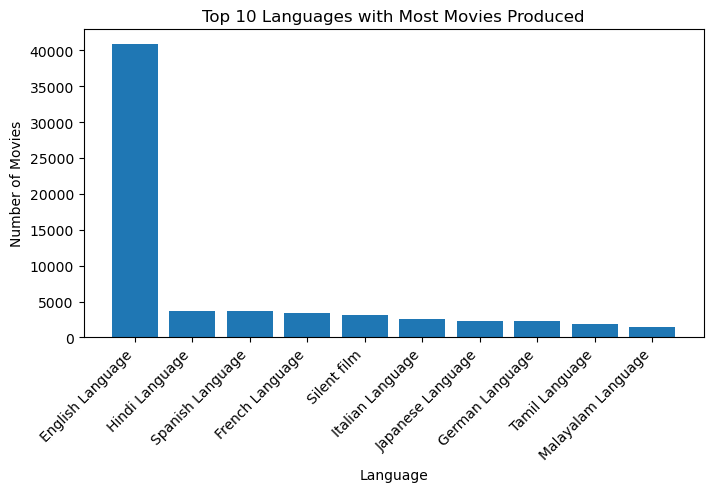

The top 1 language is English Language and represents 50.29% of all movies produced.


In [76]:
# Compute a box plot of top 10 languages with most movies produced
# Flatten the languages and count the occurrences
language_counts = {}

for languages_dict in movie_metadata['Movie languages']:
    for language in languages_dict.values():
        language_counts[language] = language_counts.get(language, 0) + 1

# Get the top 10 languages
top_languages = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a new DataFrame with the top languages
top_languages_df = pd.DataFrame(top_languages, columns=['Language', 'Count'])

# Bar plot
plt.figure(figsize=(8, 4))
plt.bar(top_languages_df['Language'], top_languages_df['Count'])
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Top 10 Languages with Most Movies Produced')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the top 1 language and its percentage
top_1_language = top_languages_df['Language'].iloc[0]
percentage = language_counts[top_1_language] / sum(language_counts.values()) * 100
print(f'The top 1 language is {top_1_language} and represents {percentage:.2f}% of all movies produced.')